# Text Classification - Sentiment Analysis

### DATA

The data you will use are taken from here: http://www.cs.cornell.edu/people/pabo/movie-review-data/ and you can find it in the ./data_sentiment folder in CSV format:

data_sentiment/train.csv: contains 1,400 reviews, 700 positive (label: 1) and 700 negative (label: 0) to be used for training.

data_sentiment/dev.csv: contains 200 reviews, 100 positive and 100 negative to be used for hyperparameter selection and monitoring the training process.

data_sentiment/test.csv: contains 400 reviews, 200 positive and 200 negative to be used for testing.

In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import re
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import random

# fixing random seed for reproducibility
random.seed(123)
np.random.seed(123)


In [2]:
df_train=pd.read_csv('data_sentiment/train.csv', names=['feature', 'label'])
df_dev=pd.read_csv('data_sentiment/dev.csv', names=['feature', 'label'])
df_test=pd.read_csv('data_sentiment/test.csv', names=['feature', 'label'])

In [3]:
df_train

,feature,label
0,note : some may consider portions of the follo...,1
1,note : some may consider portions of the follo...,1
2,every once in a while you see a film that is s...,1
3,"when i was growing up in 1970s , boys in my sc...",1
4,"the muppet movie is the first , and the best m...",1
...,...,...
1395,it's been hours since i returned from the much...,0
1396,i'm not sure who the genius is who came up wit...,0
1397,the classic story & the production which ruine...,0
1398,"according to popular film opinion , a film's g...",0


Putting the raw texts into Python lists and their corresponding labels into NumPy arrays:


In [4]:
train_list_x = df_train['feature'].tolist()
dev_list_x = df_dev['feature'].tolist()
test_list_x = df_test['feature'].tolist()

train_arr_y = df_train['label'].to_numpy()
dev_arr_y = df_dev['label'].to_numpy()
test_arr_y = df_test['label'].to_numpy()

In [5]:
# Text processing is important part of NLP since it can provide a significant improvement in the model performance.
# All the punctuations from the text are removed
# and then expended stopwords are removed from the text to remove non-content words (meaningless terms)

train_list_x = [(re.sub(r'[^\w\_\s]','',str(item))) for item in train_list_x] 
train_list_x = [(re.sub("\d+",'',str(item))) for item in train_list_x]

dev_list_x = [(re.sub(r'[^\w\_\s]','',str(item))) for item in dev_list_x]
dev_list_x = [(re.sub("\d+",'',str(item))) for item in dev_list_x]

test_list_x = [(re.sub(r'[^\w\_\s]','',str(item))) for item in test_list_x]
test_list_x = [(re.sub("\d+",'',str(item))) for item in test_list_x]

stop_words = ['a', 'able', 'about', 'above', 'according', 'accordingly', 'across', 'actually', 'after', 'afterwards',
              'again', 'against', 'all', 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also', 'although',
              'always', 'am', 'among', 'amongst', 'an', 'and', 'another', 'any', 'anybody', 'anyhow', 'anyone',
              'anyway', 'anyways', 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'around', 'as',
              'aside', 'ask', 'asking', 'associated', 'at', 'available', 'away', 'awfully', 'b', 'be', 'became',
              'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'believe',
              'below', 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'brief', 'but', 'by', 'c',
              'came', 'can', 'cannot', 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly', 'co',
              'com', 'come', 'comes', 'concerning', 'consequently', 'consider', 'considering', 'contain', 'containing',
              'contains', 'corresponding', 'could', 'course', 'currently', 'd', 'definitely', 'described', 'despite',
              'did', 'different', 'do', 'does', 'doing', 'done', 'down', 'downwards', 'during', 'e', 'each', 'edu',
              'eg', 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially', 'et', 'etc', 'even',
              'ever', 'every', 'everybody', 'everyone', 'everything', 'everywhere', 'ex', 'exactly', 'example',
              'except', 'f', 'far', 'few', 'fifth', 'first', 'five', 'followed', 'following', 'follows', 'for',
              'former', 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'g', 'get', 'gets', 'getting',
              'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten', 'greetings', 'h', 'had', 'happens',
              'hardly', 'has', 'have', 'having', 'he', 'hello', 'help', 'hence', 'her', 'here', 'hereafter', 'hereby',
              'herein', 'hereupon', 'hers', 'herself', 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how',
              'howbeit', 'however', 'i', 'ie', 'if', 'ignored', 'immediate', 'in', 'inasmuch', 'inc', 'indeed',
              'indicate', 'indicated', 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'it',
              'its', 'itself', 'j', 'just', 'k', 'keep', 'keeps', 'kept', 'know', 'knows', 'known', 'l', 'last',
              'lately', 'later', 'latter', 'latterly', 'least', 'less', 'lest', 'let', 'like', 'liked', 'likely',
              'little', 'look', 'looking', 'looks', 'ltd', 'm', 'mainly', 'many', 'may', 'maybe', 'me', 'mean',
              'meanwhile', 'merely', 'might', 'more', 'moreover', 'most', 'mostly', 'much', 'must', 'my', 'myself',
              'n', 'name', 'namely', 'nd', 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never',
              'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none', 'noone', 'nor', 'normally',
              'not', 'nothing', 'novel', 'now', 'nowhere', 'o', 'obviously', 'of', 'off', 'often', 'oh', 'ok',
              'okay', 'old', 'on', 'once', 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise',
              'ought', 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own', 'p', 'particular',
              'particularly', 'per', 'perhaps', 'placed', 'please', 'plus', 'possible', 'presumably', 'probably',
              'provides', 'q', 'que', 'quite', 'qv', 'r', 'rather', 'rd', 're', 'really', 'reasonably', 'regarding',
              'regardless', 'regards', 'relatively', 'respectively', 'right', 's', 'said', 'same', 'saw', 'say',
              'saying', 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming', 'seems', 'seen',
              'self', 'selves', 'sensible', 'sent', 'serious', 'seriously', 'seven', 'several', 'shall', 'she',
              'since', 'six', 'so', 'some', 'somebody', 'somehow', 'someone', 'something', 'sometime', 'sometimes',
              'somewhat', 'somewhere', 'soon', 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such',
              'sup', 'sure', 't', 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank', 'thanks', 'thanx', 'that',
              'thats', 'the', '_the', 'their', 'theirs', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 
              'thereby', 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', 'think', 'third', 'this',
              'thorough', 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to',
              'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries', 'truly', 'try', 'trying', 'twice', 
              'two', 'u', 'un', 'under', 'unfortunately', 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us',
              'use', 'used', 'useful', 'uses', 'using', 'usually', 'uucp', 'v', 'value', 'various', 'very', 'via',
              'viz', 'vs', 'w', 'want', 'wants', 'was', 'way', 'we', 'welcome', 'well', 'went', 'were', 'what', 
              'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein',
              'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom',
              'whose', 'why', 'will', 'willing', 'wish', 'with', 'within', 'without', 'wonder', 'would', 'x', 'y',
              'yes', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves', 'z','anything', 'should']

In [6]:
# simple white space tokenisation applied [using "split()" function] inside the extract_ngrams function.

def extract_ngrams(x_raw, n = (1,2,3), stop_words=stop_words, vocab = set(), char_ngrams = False):

    x_raw_unigrams = ([term for term in (x_raw.split()) if term not in stop_words])
    ngrams = []
    if not char_ngrams:
        for num in n:
            ngrams+= [x_raw_unigrams[i:i+num] for i in range(len(x_raw_unigrams)-num+1)]
            
    if char_ngrams:
        for num in n:
            for token in x_raw_unigrams:
                ngrams += ([token[i:i+num] for i in range(len(token)-num+1)])
                
    return ngrams

In [7]:
# It is just to see the all ngrams and ch_ngrams clear and make them more readable
# there are 2 modify functions for ngrams and ch_ngrams
 
def modify_ngrams(docs):
    modified_ngrams = []
    for k in range(len(docs)):
        ngrams = np.array([' '.join([str(ngram) for ngram in doc]) for doc in docs[k]])
        modified_ngrams.append(ngrams)
    return modified_ngrams

In [8]:
def modify_ch_ngrams(docs):
    modified_ngrams = []
    for k in range(len(docs)):
        ngrams = np.array([''.join([str(ngram) for ngram in doc]) for doc in docs[k]])
        modified_ngrams.append(ngrams)
    return modified_ngrams

In [9]:
ngrams_train = modify_ngrams([extract_ngrams(train_list_x[i], char_ngrams=False, n =(1,2,3))
                              for i in range(len(train_list_x))])
ngrams_dev = modify_ngrams([extract_ngrams(dev_list_x[i], char_ngrams=False, n =(1,2,3))
                            for i in range(len(dev_list_x))])
ngrams_test = modify_ngrams([extract_ngrams(test_list_x[i], char_ngrams=False, n =(1,2,3))
                             for i in range(len(test_list_x))])

ch_ngrams_train = modify_ch_ngrams([extract_ngrams(train_list_x[i], char_ngrams=True, n =(4,5))
                                    for i in range(len(train_list_x))])
ch_ngrams_dev = modify_ch_ngrams([extract_ngrams(dev_list_x[i], char_ngrams=True, n =(4,5))
                                  for i in range(len(dev_list_x))])
ch_ngrams_test = modify_ch_ngrams([extract_ngrams(test_list_x[i], char_ngrams=True, n =(4,5))
                                   for i in range(len(test_list_x))])

In [10]:
# and simple white space tokenisation applied ( using "split()" function ) inside the extract_ngrams function.

def get_vocab(X_raw, min_df= 10, keep_topN=5000, char_ngrams=False):
    df=Counter()
    for ngram in X_raw:
        df.update(set(ngram))
    df = Counter({k: c for k, c in df.items() if c >= min_df})
    c = Counter(np.concatenate(X_raw))
    ngram_counts = dict(Counter({k: c for k, c in c.items() if k in df.keys()}).most_common(keep_topN))
    df = Counter({k: c for k, c in df.items() if k in ngram_counts.keys()})
    df = dict(sorted(df.items(), key=lambda pair: pair[0], reverse=False))
    vocab = set(df)   
    return  vocab, df, ngram_counts

In [11]:
vocab, df, ngram_counts = get_vocab(ngrams_train, char_ngrams=False)
vocab_ch, df_ch, ngram_counts_ch = get_vocab(ch_ngrams_train, char_ngrams=True)

In [12]:
id_vocab = dict(enumerate((sorted(vocab))))
vocab_id = {val:key for key,val in id_vocab.items()}

id_vocab_ch = dict(enumerate((sorted(vocab_ch))))
vocab_id_ch = {val:key for key,val in id_vocab_ch.items()}

In [13]:
#conditions in the get_vocab functions (ngram is in the vocab or not) are checked here. 

ngrams_train =[np.array([n for n in t if n in vocab]) for t in ngrams_train]
ngrams_devn = [np.array([n for n in t if n in vocab]) for t in ngrams_dev]
ngrams_test = [np.array([n for n in t if n in vocab]) for t in ngrams_test]

ch_ngrams_train =[np.array([n for n in t if n in vocab_ch]) for t in ch_ngrams_train]
ch_ngrams_devn = [np.array([n for n in t if n in vocab_ch]) for t in ch_ngrams_dev]
ch_ngrams_test = [np.array([n for n in t if n in vocab_ch]) for t in ch_ngrams_test]

## Vectorise documents 

In [14]:
# the result of vectorise functions gives the term freq. matrix as seen below.
# and it will be used in next stages to not compute it again

def vectorise(X_ngram, vocab): 
    vocab = dict.fromkeys(vocab)            
    matrix_tf = np.zeros((1,len(vocab)))
    for doc in X_ngram:
        c = Counter(doc)
        tf_vectors = np.array([c[key] for key in vocab.keys()])
        # below function gives the tf of each term (# term / total # of terms in a document)
        tf_vectors = tf_vectors / tf_vectors.sum()
        matrix_tf = np.vstack([matrix_tf, tf_vectors])
    matrix_tf = matrix_tf[1:]
    
    return matrix_tf

#### Count vectors

In [15]:
# all LR's count (TF) vector are below. 

matrix_tf_train = vectorise(ngrams_train, vocab=vocab_id)
matrix_tf_dev = vectorise(ngrams_dev, vocab=vocab_id)
matrix_tf_test = vectorise(ngrams_test, vocab=vocab_id)

matrix_tf_train_ch = vectorise(ch_ngrams_train, vocab=vocab_id_ch)
matrix_tf_dev_ch = vectorise(ch_ngrams_dev, vocab=vocab_id_ch)
matrix_tf_test_ch = vectorise(ch_ngrams_test, vocab=vocab_id_ch)

merged_matrix_tf_train = np.hstack([matrix_tf_train, matrix_tf_train_ch])
merged_matrix_tf_dev = np.hstack([matrix_tf_dev, matrix_tf_dev_ch])
merged_matrix_tf_test = np.hstack([matrix_tf_test, matrix_tf_test_ch])

#### TF.IDF vectors

In [16]:
idf = (np.array([np.log10(len(train_list_x) / df[ngram]) for ngram in df]))
idf_ch = (np.array([np.log10(len(train_list_x) / df_ch[ngram]) for ngram in df_ch]))

In [17]:
# all LR's count (TFIDF) vector are below. 

matrix_tf_idf_train = matrix_tf_train * idf
matrix_tf_idf_dev = matrix_tf_dev * idf 
matrix_tf_idf_test = matrix_tf_test * idf

matrix_tf_idf_train_ch = matrix_tf_train_ch * idf_ch
matrix_tf_idf_dev_ch = matrix_tf_dev_ch * idf_ch
matrix_tf_idf_test_ch = matrix_tf_test_ch * idf_ch

merged_matrix_tf_idf_train = np.hstack([matrix_tf_idf_train, matrix_tf_idf_train_ch])
merged_matrix_tf_idf_dev = np.hstack([matrix_tf_idf_dev, matrix_tf_idf_dev_ch])
merged_matrix_tf_idf_test = np.hstack([matrix_tf_idf_test, matrix_tf_idf_test_ch])


# Binary Logistic Regression

In [18]:
def sigmoid(z):
    
    sig = 1. / (1. + np.exp(-z))
    return sig

In [19]:
def predict_proba(X, weights):
    
    preds_proba = sigmoid(np.dot(X, weights))
    return preds_proba

In [20]:
def predict_class(X, weights):
    prob = predict_proba(X, weights)
    preds_class = np.where(prob<0.5, 0, 1)
    
    return preds_class

In [21]:
def binary_loss(X, Y, weights, alpha=0.00001):
    y_pred = predict_proba(X, weights)
    e  = 0.000001 # to prevent undefined log(0) issue, very small number are added into the log() 
    loss = -(Y * np.log(y_pred+e) + (1 - Y) * np.log(1 - y_pred+e)) + alpha * np.sum(np.square(weights))

    return loss

In [22]:
def SGD(X_tr, Y_tr, X_dev=[], Y_dev=[], lr=0.8, alpha=0.0000000001, epochs=100, tolerance=0.0000001,
                                                                            print_progress=True):

    training_loss_history =  np.zeros(0)
    validation_loss_history =  np.zeros(0)
    w = np.zeros(X_tr.shape[1])
    
    for i in range(epochs):
        rand1 = np.random.permutation(len(X_tr))
        X_tr = X_tr[rand1]
        Y_tr = Y_tr[rand1]
        
        train_initial_loss = np.zeros(0)
        val_initial_loss = np.array([1,10])

        for k in range(len(X_tr)):
            loss_train = binary_loss(X_tr[k], Y_tr[k], w, alpha)
            train_initial_loss = np.append(train_initial_loss, loss_train)
            
            gradient = (predict_proba(X_tr[k], w) - Y_tr[k]) * X_tr[k]
            regular_dev = 2 * alpha * w
            w = w - lr * (gradient + regular_dev)
        training_loss_history = np.append(training_loss_history, train_initial_loss.mean())

        for j in range(len(X_dev)):
            loss_dev = binary_loss(X_dev[j], Y_dev[j], w, alpha)
            val_initial_loss = np.append(val_initial_loss, loss_dev)
            diff = np.absolute(val_initial_loss[-1] - val_initial_loss[-2])
            if diff < tolerance:
                break
        validation_loss_history = np.append(validation_loss_history, (val_initial_loss[2:]).mean())        
        if print_progress:
            print(f"epoch:{i+1}  " , f"training_loss: {training_loss_history[-1]}  ", 
                  f"validation_loss: {validation_loss_history[-1]} ")
        
  
    return w, training_loss_history, validation_loss_history

## Train and Evaluate Logistic Regression with Count vectors

In [23]:
# the grid search method is used to decide the hyperparameters combination (for alpha and lr) using hyper_param function. 
# first, the loss function will be calculated for all hyperparameters combinations
# then, the hyperparameters which give the lowest Loss will be selected. 
# the Loss matrix also can be seen to see the effects of different hyperparameters on the performance. 
# this process will be applied for all LR models before the evaluation process. 
# then, SGD function will be computed with hyperparameters obtained from hyper_param function to evaluate scores. 

num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([3, 4, 5])
loss_matrix = np.empty([num, num])

def hyper_params(X_tr, Y_tr, X_dev, Y_dev, X_test, epochs, tolerance=0.000001, print_progress=False): 
    for i in range(num):
        for j in range(num):
            alpha = alpha_vec[i]
            lr = lr_vec[j]
            weights, training_loss_history, validation_loss_history = SGD(X_tr, Y_tr, X_dev, Y_dev, lr=lr, alpha=alpha, 
                                                                            epochs=epochs, tolerance=0.0000001, 
                                                                           print_progress=print_progress)
            
            loss_matrix[i, j] = training_loss_history.min()
     
    best_params = np.argwhere(loss_matrix == np.min(loss_matrix))
    alpha = alpha_vec[best_params[0][0]]
    lr   = lr_vec[best_params[0][1]]
    
    return weights, alpha, lr, loss_matrix

In [24]:
# there are all function below to evaluate all scores.

def accuracy_score(y, pred):
    accuracy = (y == pred).sum() / len(y)
    return accuracy

def precision_score(y, pred):
    TP = ((pred == 1) & (y == 1)).sum()
    FP = ((pred == 1) & (y == 0)).sum()
    precision = TP / (TP+FP)
    return precision

def recall_score(y, pred):
    TP = ((pred == 1) & (y == 1)).sum()
    FN = ((pred == 0) & (y == 1)).sum()
    recall_score = TP / (TP+FN)
    return recall_score

def f1_score(y, pred):
    f1_score = (2*precision_score(y, pred)*recall_score(y,pred))/(precision_score(y, pred)+recall_score(y, pred))
    return f1_score

### 1) BOW-count 

In [25]:
num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([2,3,4])
loss_matrix = np.empty([num, num])

In [26]:
weights, alpha, lr, loss_matrix = hyper_params(matrix_tf_train, train_arr_y, matrix_tf_dev, dev_arr_y,
                                               matrix_tf_test, epochs=10, tolerance=0.000001, print_progress=False)

In [27]:
print(loss_matrix)
print(alpha)
print(lr)

[[0.5890344  0.55357343 0.52404529]
 [0.58904822 0.55374709 0.52420239]
 [0.58953551 0.5545528  0.52574764]]
1e-09
4


In [28]:
weights, training_loss_history, validation_loss_history = SGD(matrix_tf_train, train_arr_y, matrix_tf_dev, dev_arr_y,
                                                              lr=lr, alpha=0.0000001, epochs=100)

epoch:1   training_loss: 0.6825651583941296   validation_loss: 0.6690430914015778 
epoch:2   training_loss: 0.6565674002028953   validation_loss: 0.6500234474508144 
epoch:3   training_loss: 0.6336319984092557   validation_loss: 0.6345462020408142 
epoch:4   training_loss: 0.6136088599879159   validation_loss: 0.6206589496989827 
epoch:5   training_loss: 0.5954967015674749   validation_loss: 0.6092033207580831 
epoch:6   training_loss: 0.5791386266982326   validation_loss: 0.5983312493675892 
epoch:7   training_loss: 0.5641382688849155   validation_loss: 0.588952308169806 
epoch:8   training_loss: 0.5503470665108531   validation_loss: 0.5806701216451919 
epoch:9   training_loss: 0.5373767368674764   validation_loss: 0.5735362043225105 
epoch:10   training_loss: 0.5256452082551599   validation_loss: 0.5663626101388011 
epoch:11   training_loss: 0.5146244294721221   validation_loss: 0.5597913396522728 
epoch:12   training_loss: 0.5042662459174299   validation_loss: 0.5539256014651284 
ep

epoch:98   training_loss: 0.24332465510062604   validation_loss: 0.4478458615068051 
epoch:99   training_loss: 0.24231600841129397   validation_loss: 0.4474679890329098 
epoch:100   training_loss: 0.24133444614050226   validation_loss: 0.447403775867414 


Now plot the training and validation history per epoch for the best hyperparameter combination. Does your model underfit, overfit or is it about right? Explain why.

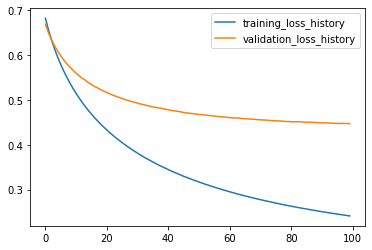

In [29]:
plt.plot(training_loss_history, label = "training_loss_history")
plt.plot(validation_loss_history, label = "validation_loss_history")
plt.legend()
plt.show()

Explanation:

The model is OK with the selected the best hyperparameters. 
There is no any overfitting and/or underfitting problems. 
Validation Loss is higher than training loss, as expected. 
Validation and Training Loss are decreasing by every epoch. 
There is reasonable relation between the validation loss and training loss. 
The model's learning process is not so long or short, so it is reasonable and acceptable considering whole data. 

In [30]:
preds_te_count = predict_class(matrix_tf_test, weights)

BOW_count_accuracy = accuracy_score(test_arr_y, preds_te_count)
BOW_count_precision = precision_score(test_arr_y, preds_te_count)
BOW_count_recall = recall_score(test_arr_y, preds_te_count)
BOW_count_f1_score = f1_score(test_arr_y, preds_te_count)

print('Accuracy:', BOW_count_accuracy)
print('Precision:', BOW_count_precision)
print('Recall:', BOW_count_recall)
print('F1-Score:', BOW_count_f1_score)

Accuracy: 0.8375
Precision: 0.813953488372093
Recall: 0.875
F1-Score: 0.8433734939759036


In [31]:
top_neg = weights.argsort()[:10]
for i in top_neg:
    print(id_vocab[i])

bad
worst
boring
supposed
script
reason
plot
stupid
ridiculous
attempt


In [32]:
top_pos = weights.argsort()[::-1][:10]
for i in top_pos:
    print(id_vocab[i])

great
fun
hilarious
world
true
simple
perfectly
perfect
jackie
life


### If we were to apply the classifier we've learned into a different domain such laptop reviews or restaurant reviews, do you think these features would generalise well? Can you propose what features the classifier could pick up as important in the new domain?

Comment: Considering the features shown above, it can be said that features are reasonable. Top-10 positive and negative features are meaningful and important considering the classification model. 

Answer: It is possible to some extent to apply these features into different domains (laptop reviews or restaurant reviews).
The issue is to choose the features according to new domain's concept. If we know that new domains are laptop reviews or restaurant reviews, we can propose some features.
For example, considering the top 10 positive words, some features like "true, perfect, perfectly, great, simple, life" can be important to use in the new domain whereas some features like "jackie, hilarious, fun" can not be used in new domain. On the other hand, considering the top 10 negative words, some features like "bad, worst, boring, reason" can be significant to use in the new domain whereas some features like "stupid, plot, attempt" can not be used in new domain.

If we do not know the new domain's concept, we can suggest more general features like: "true, perfect, perfectly, great, bad, worst".

### Discuss how did you choose model hyperparameters (e.g. learning rate and regularisation strength)? What is the relation between training epochs and learning rate? How the regularisation strength affects performance?

Answer: Learning rate and regularisation strength are considered as hyperparameters in this implementation. Grid search which is the simplest algorithm for hyperparameter tuning is applied to choose the best hyperparameters. Every combination of values of this grid is tried to find the best combination. Normally, to check every combination of the grid requires a lot of time, and it is possible to try combinations randomly as stated in the assignment. However, considering this implementation, all combinations are computed and best of them are selected since there is no any time issue in this implementation. The grid values are estimated manually. Total number of epochs is the same (100) in all LR models. So, to train the model efficiently, the learning rate is set as a big range of values (comparing the traditional lr) and this works well as seen in the related graphs. This is because the model is expected to learn well enough within the 100 epochs.

The relation between learning rate and epochs: Firstly, the learning rate controls how rapidly the model is adjusted/adapted to the problem. If the learning rates are small, it requires more epochs to make changes after each iteration/update. Also, it means the model requires more time to be trained, and it can be expensive. In addition, if the learning rates are big values, this causes quick changes and requires less training epochs. It is possible to make enough changes after each iteration/update. However, this can cause the model to converge too rapidly to a not optimal solution.

The main purpose of the regularisation strength is to prevent overfitting, since it is a big concern if the model perfectly matches with the training data. Also, it will produce very high weights. Basically, to penalize the Loss Function, regularisation term (penalty) is added to the Loss (to increase the loss function) considering the large weights. So, the model is able to generalize to make good predictions from the test (unseen) data. So, it can improve the generalization performance on test (unseen) data. For this purpose, L1 and L2 methods can be used.

### 2) BOW-tfidf 

In [33]:
num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([2,3,4])
loss_matrix = np.empty([num, num])

In [34]:
weights, alpha, lr, loss_matrix = hyper_params(matrix_tf_idf_train, train_arr_y, matrix_tf_idf_dev, dev_arr_y,
                                               matrix_tf_idf_test, epochs=10, tolerance=0.000001,
                                               print_progress=False)

In [35]:
print(loss_matrix)
print(alpha)
print(lr)

[[0.56633963 0.52084675 0.48314   ]
 [0.56639893 0.52094189 0.48330081]
 [0.5669682  0.52208806 0.48509698]]
1e-09
4


In [36]:
weights, training_loss_history, validation_loss_history = SGD(matrix_tf_idf_train, train_arr_y, matrix_tf_idf_dev,
                                                              dev_arr_y, lr=lr, alpha=alpha, epochs=100)

epoch:1   training_loss: 0.6838216686349065   validation_loss: 0.6753201805722275 
epoch:2   training_loss: 0.6520996258729904   validation_loss: 0.6593856888957975 
epoch:3   training_loss: 0.623543298730114   validation_loss: 0.6450402657218325 
epoch:4   training_loss: 0.5977276216961984   validation_loss: 0.6321235971009884 
epoch:5   training_loss: 0.574281411213871   validation_loss: 0.6204008184085247 
epoch:6   training_loss: 0.5528903184945094   validation_loss: 0.6097095965154936 
epoch:7   training_loss: 0.5332811566502923   validation_loss: 0.5999305100685495 
epoch:8   training_loss: 0.5152450921544173   validation_loss: 0.5909784123613557 
epoch:9   training_loss: 0.4985592076523311   validation_loss: 0.5828260654678995 
epoch:10   training_loss: 0.48311303507915454   validation_loss: 0.5752751493899383 
epoch:11   training_loss: 0.4687894757685916   validation_loss: 0.568131027221782 
epoch:12   training_loss: 0.455389306053009   validation_loss: 0.561523611837687 
epoch

epoch:99   training_loss: 0.14190574745407397   validation_loss: 0.4180815100491397 
epoch:100   training_loss: 0.140806905579947   validation_loss: 0.41767704743381956 


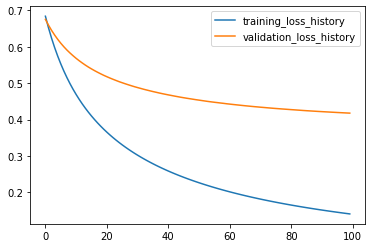

In [37]:
plt.plot(training_loss_history, label = "training_loss_history")
plt.plot(validation_loss_history, label = "validation_loss_history")
plt.legend()
plt.show()

Explanation:

The model is OK with the selected the best hyperparameters. 
There is no any overfitting and/or underfitting problems. 
Validation Loss is higher than training loss, as expected. 
Validation and Training Loss are decreasing by every epoch. 
There is reasonable relation between the validation loss and training loss. 
The model's learning process is not so long or short, so it is reasonable and acceptable considering whole data. 

In [38]:
preds_te_tfidf = predict_class(matrix_tf_idf_test, weights)

BOW_tfidf_accuracy = accuracy_score(test_arr_y, preds_te_tfidf)
BOW_tfidf_precision = precision_score(test_arr_y, preds_te_tfidf)
BOW_tfidf_recall = recall_score(test_arr_y, preds_te_tfidf)
BOW_tfidf_f1_score = f1_score(test_arr_y, preds_te_tfidf)

print('Accuracy:', BOW_tfidf_accuracy)
print('Precision:', BOW_tfidf_precision)
print('Recall:', BOW_tfidf_recall)
print('F1-Score:', BOW_tfidf_f1_score)

Accuracy: 0.845
Precision: 0.8415841584158416
Recall: 0.85
F1-Score: 0.845771144278607


In [39]:
top_neg = weights.argsort()[:10]
for i in top_neg:
    print(id_vocab[i])

bad
worst
boring
supposed
stupid
ridiculous
script
fails
waste
wasted


In [40]:
top_pos = weights.argsort()[::-1][:10]
for i in top_pos:
    print(id_vocab[i])

great
hilarious
terrific
truman
fun
perfectly
excellent
perfect
life
simple


### 3) BOCN-count 

In [41]:
num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([2,3,4])
loss_matrix = np.empty([num, num])

In [42]:
weights, alpha, lr, loss_matrix = hyper_params(matrix_tf_train_ch, train_arr_y, matrix_tf_dev_ch, dev_arr_y,
                                            matrix_tf_test_ch, epochs=10, tolerance=0.000001,
                                               print_progress=False)

In [43]:
print(loss_matrix)
print(alpha)
print(lr)

[[0.66266098 0.64932423 0.63698941]
 [0.66268377 0.64935348 0.63698661]
 [0.66282167 0.64966736 0.63754794]]
1e-08
4


In [44]:
weights, training_loss_history, validation_loss_history = SGD(matrix_tf_train_ch, train_arr_y, matrix_tf_dev_ch,
                                                              dev_arr_y, lr=lr, alpha=alpha, epochs=100)

epoch:1   training_loss: 0.6907359577928105   validation_loss: 0.6869689670680139 
epoch:2   training_loss: 0.6837922516368484   validation_loss: 0.6811607520550487 
epoch:3   training_loss: 0.6771904102414807   validation_loss: 0.6755810898582559 
epoch:4   training_loss: 0.6708230986548167   validation_loss: 0.6702097005195327 
epoch:5   training_loss: 0.6647031748299941   validation_loss: 0.6651304611463378 
epoch:6   training_loss: 0.6587841594356636   validation_loss: 0.6603101981530903 
epoch:7   training_loss: 0.6530761215384729   validation_loss: 0.655702914645293 
epoch:8   training_loss: 0.6475598859087718   validation_loss: 0.6512708704176646 
epoch:9   training_loss: 0.6422149649877474   validation_loss: 0.647045320737333 
epoch:10   training_loss: 0.6370221071191017   validation_loss: 0.6429281261504799 
epoch:11   training_loss: 0.6320234269561066   validation_loss: 0.6390408033936307 
epoch:12   training_loss: 0.6271524859452893   validation_loss: 0.6353139072475456 
epo

epoch:100   training_loss: 0.42422672266856987   validation_loss: 0.506046062586729 


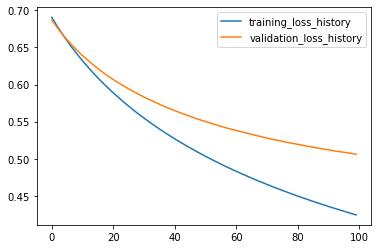

In [45]:
plt.plot(training_loss_history, label = "training_loss_history")
plt.plot(validation_loss_history, label = "validation_loss_history")
plt.legend()
plt.show()

Explanation:

The model is OK with the selected the best hyperparameters. 
There is no any overfitting and/or underfitting problems. 
Validation Loss is higher than training loss, as expected. 
Validation and Training Loss are decreasing by every epoch. 
There is reasonable relation between the validation loss and training loss. 
The model's learning process is not so long or short, so it is reasonable and acceptable considering whole data. 

In [46]:
preds_te_BOCN_count = predict_class(matrix_tf_test_ch, weights)

BOCN_count_accuracy = accuracy_score(test_arr_y, preds_te_BOCN_count)
BOCN_count_precision = precision_score(test_arr_y, preds_te_BOCN_count)
BOCN_count_recall = recall_score(test_arr_y, preds_te_BOCN_count)
BOCN_count_f1_score = f1_score(test_arr_y, preds_te_BOCN_count)

print('Accuracy:', BOCN_count_accuracy)
print('Precision:', BOCN_count_precision)
print('Recall:', BOCN_count_recall)
print('F1-Score:', BOCN_count_f1_score)

Accuracy: 0.8175
Precision: 0.8067632850241546
Recall: 0.835
F1-Score: 0.8206388206388205


In [47]:
top_neg = weights.argsort()[:10]
for i in top_neg:
    print(id_vocab_ch[i])

plot
wors
acti
ppos
make
wast
uppos
ppose
waste
worst


In [48]:
top_pos = weights.argsort()[::-1][:10]
for i in top_pos:
    print(id_vocab_ch[i])

reat
grea
great
fect
ecti
ding
life
perf
ture
rful


### 4) BOCN tfidf 

In [49]:
num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([2,3,4])
loss_matrix = np.empty([num, num])

In [50]:
weights, alpha, lr, loss_matrix = hyper_params(matrix_tf_idf_train_ch, train_arr_y, matrix_tf_idf_dev_ch, dev_arr_y,
                                               matrix_tf_idf_test_ch, epochs=10, tolerance=0.000001,
                                               print_progress=False)

In [51]:
alpha, lr, loss_matrix

(1e-09,
 4,
 array([[0.67768837, 0.67031353, 0.66316021],
        [0.67769421, 0.67032986, 0.6631892 ],
        [0.67776974, 0.67049402, 0.66347377]]))

In [52]:
weights, training_loss_history, validation_loss_history = SGD(matrix_tf_idf_train_ch, train_arr_y, matrix_tf_idf_dev_ch,
                                                              dev_arr_y, lr=lr, alpha=alpha, epochs=100)

epoch:1   training_loss: 0.6920406175091869   validation_loss: 0.6909307690930254 
epoch:2   training_loss: 0.688656907287468   validation_loss: 0.6887459546040386 
epoch:3   training_loss: 0.6853191059581448   validation_loss: 0.6865878760913219 
epoch:4   training_loss: 0.6820231031067265   validation_loss: 0.6844602021600766 
epoch:5   training_loss: 0.6787781793485309   validation_loss: 0.6823568436674762 
epoch:6   training_loss: 0.6755709639002001   validation_loss: 0.6802816938708369 
epoch:7   training_loss: 0.6724063905295427   validation_loss: 0.6782310181653781 
epoch:8   training_loss: 0.6692865590258811   validation_loss: 0.6762087903633934 
epoch:9   training_loss: 0.666204055089928   validation_loss: 0.6742106358855673 
epoch:10   training_loss: 0.6631607714708174   validation_loss: 0.6722391892344151 
epoch:11   training_loss: 0.6601524985808169   validation_loss: 0.6702946833431337 
epoch:12   training_loss: 0.6571903703584397   validation_loss: 0.6683734147312331 
epo

epoch:100   training_loss: 0.48957470841046163   validation_loss: 0.5617831777550356 


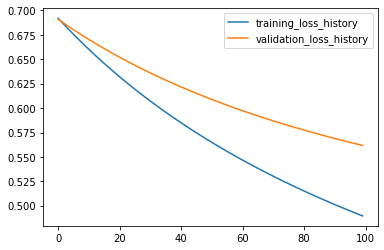

In [53]:
plt.plot(training_loss_history, label = "training_loss_history")
plt.plot(validation_loss_history, label = "validation_loss_history")
plt.legend()
plt.show()

Explanation:

The model is OK with the selected the best hyperparameters. 
There is no any overfitting and/or underfitting problems. 
Validation Loss is higher than training loss, as expected. 
Validation and Training Loss are decreasing by every epoch. 
There is reasonable relation between the validation loss and training loss. 
The model's learning process is not so long or short, so it is reasonable and acceptable considering whole data. 

In [54]:
preds_te_BOCN_tfidf = predict_class(matrix_tf_idf_test_ch, weights)

BOCN_tfidf_accuracy = accuracy_score(test_arr_y, preds_te_BOCN_tfidf)
BOCN_tfidf_precision = precision_score(test_arr_y, preds_te_BOCN_tfidf)
BOCN_tfidf_recall = recall_score(test_arr_y, preds_te_BOCN_tfidf)
BOCN_tfidf_f1_score = f1_score(test_arr_y, preds_te_BOCN_tfidf)

print('Accuracy:', BOCN_tfidf_accuracy)
print('Precision:', BOCN_tfidf_precision)
print('Recall:', BOCN_tfidf_recall)
print('F1-Score:', BOCN_tfidf_f1_score)

Accuracy: 0.8175
Precision: 0.8009478672985783
Recall: 0.845
F1-Score: 0.8223844282238443


In [55]:
top_neg = weights.argsort()[:10]
for i in top_neg:
    print(id_vocab_ch[i])

wors
waste
wast
worst
stup
upid
tupi
tupid
stupi
orst


In [56]:
top_pos = weights.argsort()[::-1][:10]
for i in top_pos:
    print(id_vocab_ch[i])

grea
beau
great
erfec
rfect
rfec
perfe
erful
rful
erfe


### 5) BOW + BOCN tfidf 

In [57]:
num = 3
alpha_vec = np.array([0.000000001, 0.00000001, 0.0000001])
lr_vec = np.array([2,3,4])
loss_matrix = np.empty([num, num])

In [58]:
weights, alpha, lr, loss_matrix = hyper_params(merged_matrix_tf_idf_train, train_arr_y, merged_matrix_tf_idf_dev, 
                                               dev_arr_y, merged_matrix_tf_idf_test, epochs=10, tolerance=0.000001, 
                                               print_progress=False)

In [59]:
print(loss_matrix)
print(alpha)
print(lr)

[[0.55647013 0.50876638 0.46972093]
 [0.55654049 0.50887927 0.46988031]
 [0.55713467 0.51007545 0.47178392]]
1e-09
4


In [60]:
weights, training_loss_history, validation_loss_history = SGD(merged_matrix_tf_idf_train, train_arr_y,
                                                              merged_matrix_tf_idf_dev, dev_arr_y, lr=lr, 
                                                              alpha=alpha, epochs=100)

epoch:1   training_loss: 0.6827659026970376   validation_loss: 0.6732744605230613 
epoch:2   training_loss: 0.6481531717351838   validation_loss: 0.6557190717084426 
epoch:3   training_loss: 0.6173341112126272   validation_loss: 0.6400296590428965 
epoch:4   training_loss: 0.5897028292376054   validation_loss: 0.6259876082131166 
epoch:5   training_loss: 0.5647862340879005   validation_loss: 0.6132830078760667 
epoch:6   training_loss: 0.5422559188196234   validation_loss: 0.6019139050322297 
epoch:7   training_loss: 0.5216979306888415   validation_loss: 0.5914907880940077 
epoch:8   training_loss: 0.5028892388502748   validation_loss: 0.58194172272072 
epoch:9   training_loss: 0.48563094575458665   validation_loss: 0.5733293629907279 
epoch:10   training_loss: 0.46969698929751297   validation_loss: 0.5653690075375506 
epoch:11   training_loss: 0.45492850573766497   validation_loss: 0.5579570881588749 
epoch:12   training_loss: 0.44122164886546517   validation_loss: 0.5510678502928504 

epoch:98   training_loss: 0.13303209272817765   validation_loss: 0.4088794393633205 
epoch:99   training_loss: 0.13197081170491098   validation_loss: 0.40845367864911436 
epoch:100   training_loss: 0.13092628834674844   validation_loss: 0.40804850250394353 


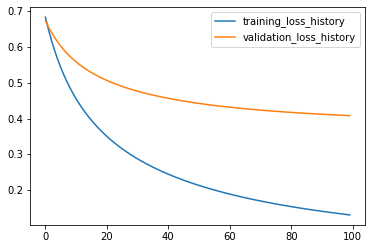

In [61]:
plt.plot(training_loss_history, label = "training_loss_history")
plt.plot(validation_loss_history, label = "validation_loss_history")
plt.legend()
plt.show()

Explanation:

The model is OK with the selected the best hyperparameters. 
There is no any overfitting and/or underfitting problems. 
Validation Loss is higher than training loss, as expected. 
Validation and Training Loss are decreasing by every epoch. 
There is reasonable relation between the validation loss and training loss. 
The model's learning process is not so long or short, so it is reasonable and acceptable considering whole data. 

In [62]:
preds_te_BOW_BOCN_tfidf = predict_class(merged_matrix_tf_idf_test, weights)

BOW_BOCN_tfidf_accuracy = accuracy_score(test_arr_y, preds_te_BOW_BOCN_tfidf)
BOW_BOCN_tfidf_precision = precision_score(test_arr_y, preds_te_BOW_BOCN_tfidf)
BOW_BOCN_tfidf_recall = recall_score(test_arr_y, preds_te_BOW_BOCN_tfidf)
BOW_BOCN_tfidf_f1_score = f1_score(test_arr_y, preds_te_BOW_BOCN_tfidf)

print('Accuracy:', BOW_BOCN_tfidf_accuracy)
print('Precision:', BOW_BOCN_tfidf_precision)
print('Recall:', BOW_BOCN_tfidf_recall)
print('F1-Score:', BOW_BOCN_tfidf_f1_score)

Accuracy: 0.85
Precision: 0.8431372549019608
Recall: 0.86
F1-Score: 0.8514851485148515


In [63]:
top_neg = weights.argsort()[:10]
for i in top_neg:
    print(id_vocab_ch[i])

arto
xcit
blic
tele
tabl
ribl
film
rrat
victi
eriz


In [64]:
top_pos = weights.argsort()[::-1][:10]
for i in top_pos:
    print(id_vocab_ch[i])

iest
insp
uble
tino
hors
osing
eyre
share
oses
medi




## Full Results

In [65]:
data = {'Precision' :[BOW_count_precision, BOW_tfidf_precision, BOCN_count_precision,
                      BOCN_tfidf_precision, BOW_BOCN_tfidf_precision],
        'Recall' :[BOW_count_recall, BOW_tfidf_recall, BOCN_count_recall, BOCN_tfidf_recall, BOW_BOCN_tfidf_recall],
        'F1-Score' :[BOW_count_f1_score, BOW_tfidf_f1_score, BOCN_count_f1_score,
                     BOCN_tfidf_f1_score, BOW_BOCN_tfidf_f1_score]}
index = ['BOW-count', 'BOW-tfidf', 'BOCN-count', 'BOCN-tfidf', 'BOW+BOCN']

In [66]:
full_results = pd.DataFrame(data, index = index)

In [67]:
full_results

,Precision,Recall,F1-Score
BOW-count,0.813953,0.875,0.843373
BOW-tfidf,0.841584,0.850,0.845771
BOCN-count,0.806763,0.835,0.820639
BOCN-tfidf,0.800948,0.845,0.822384
BOW+BOCN,0.843137,0.860,0.851485
